In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# Import pandas
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/My Drive/LocalCV/craigslist_labels_clean_non_cars_removed.csv')

# Display first few rows to verify data loading
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset info:")
print(df.info())


First few rows of the dataset:
   year              make_model   make             model  \
0  2014  buick_lacrosse_leather  buick  lacrosse_leather   
1  2014  buick_lacrosse_leather  buick  lacrosse_leather   
2  2014  buick_lacrosse_leather  buick  lacrosse_leather   
3  2014  buick_lacrosse_leather  buick  lacrosse_leather   
4  2014  buick_lacrosse_leather  buick  lacrosse_leather   

                         label  \
0  2014_buick_lacrosse_leather   
1  2014_buick_lacrosse_leather   
2  2014_buick_lacrosse_leather   
3  2014_buick_lacrosse_leather   
4  2014_buick_lacrosse_leather   

                                           image_url  \
0  https://images.craigslist.org/00m0m_aHTPc450Pm...   
1  https://images.craigslist.org/00Q0Q_alevaLceOv...   
2  https://images.craigslist.org/00x0x_e5gmtvzqsB...   
3  https://images.craigslist.org/00L0L_gwbjbHkcqP...   
4  https://images.craigslist.org/00g0g_lQyfS5TZNx...   

                                         listing_url  \
0  https:/

In [ ]:
cars_df = df.copy()

In [ ]:
import pandas as pd
import re
from difflib import get_close_matches
from collections import defaultdict

# First extract image_id from image_path
def extract_image_id(path):
    return path.split('/')[-1].split('_')[-1]  # gets the "0.jpg" part

# Update DataFrame with image_id
cars_df['image_id'] = df['image_path'].apply(extract_image_id)


In [ ]:
cars_df.head(10)

,year,make_model,make,model,label,image_url,listing_url,image_path,car_detected,low_confidence,image_id
0,2014,buick_lacrosse_leather,buick,lacrosse_leather,2014_buick_lacrosse_leather,https://images.craigslist.org/00m0m_aHTPc450Pm...,https://chicago.craigslist.org/nwi/ctd/d/highl...,/content/drive/MyDrive/Computer Vision Project...,True,False,0.jpg
1,2014,buick_lacrosse_leather,buick,lacrosse_leather,2014_buick_lacrosse_leather,https://images.craigslist.org/00Q0Q_alevaLceOv...,https://chicago.craigslist.org/nwi/ctd/d/highl...,/content/drive/MyDrive/Computer Vision Project...,True,False,1.jpg
2,2014,buick_lacrosse_leather,buick,lacrosse_leather,2014_buick_lacrosse_leather,https://images.craigslist.org/00x0x_e5gmtvzqsB...,https://chicago.craigslist.org/nwi/ctd/d/highl...,/content/drive/MyDrive/Computer Vision Project...,True,False,2.jpg
3,2014,buick_lacrosse_leather,buick,lacrosse_leather,2014_buick_lacrosse_leather,https://images.craigslist.org/00L0L_gwbjbHkcqP...,https://chicago.craigslist.org/nwi/ctd/d/highl...,/content/drive/MyDrive/Computer Vision Project...,True,False,3.jpg
4,2014,buick_lacrosse_leather,buick,lacrosse_leather,2014_buick_lacrosse_leather,https://images.craigslist.org/00g0g_lQyfS5TZNx...,https://chicago.craigslist.org/nwi/ctd/d/highl...,/content/drive/MyDrive/Computer Vision Project...,True,False,4.jpg
5,2023,ford_maverick,ford,maverick,2023_ford_maverick,https://images.craigslist.org/00I0I_257ZpvHg6K...,https://chicago.craigslist.org/wcl/cto/d/schil...,/content/drive/MyDrive/Computer Vision Project...,True,False,5.jpg
6,2023,ford_maverick,ford,maverick,2023_ford_maverick,https://images.craigslist.org/00C0C_e4JYTRb7HS...,https://chicago.craigslist.org/wcl/cto/d/schil...,/content/drive/MyDrive/Computer Vision Project...,True,False,6.jpg
7,2016,lexus_is_300,lexus,is_300,2016_lexus_is_300,https://images.craigslist.org/00M0M_9C4upf7tio...,https://chicago.craigslist.org/chc/ctd/d/villa...,/content/drive/MyDrive/Computer Vision Project...,True,False,7.jpg
8,2016,lexus_is_300,lexus,is_300,2016_lexus_is_300,https://images.craigslist.org/00Z0Z_1yRCticMx6...,https://chicago.craigslist.org/chc/ctd/d/villa...,/content/drive/MyDrive/Computer Vision Project...,True,False,8.jpg
9,2016,lexus_is_300,lexus,is_300,2016_lexus_is_300,https://images.craigslist.org/00707_fWO95qnhxq...,https://chicago.craigslist.org/chc/ctd/d/villa...,/content/drive/MyDrive/Computer Vision Project...,True,False,9.jpg


In [ ]:
# Multiline string containing the car makes and models
car_text = """
Acura (Japan): CL, ILX, ILX Hybrid, Integra, Legend, MDX, NSX, RDX, RL, RLX, RSX, SLX, TL, TLX, TSX, TSX Sport Wagon, Vigor, ZDX.

Alfa Romeo (Italy): 4C, Giulia, Stelvio, Tonale.

AM General (United States): Hummer.

Aston Martin (United Kingdom): DB11, DB7, DB9, DB9 GT, DBS, DBS Superleggera, DBX, DBX707, Rapide, Rapide AMR, Rapide S, V12 Vanquish, V12 Vantage, V12 Vantage S, V8 Vantage, Vanquish, Vanquish S, Vantage, Virage.

Audi (Germany): 80, 90, 100, 200, A3, A3 Sportback e-tron, A4, A4 allroad, A5, A6, A6 allroad, A7, A8, allroad, allroad quattro, Cabriolet, Coupe, e-tron, e-tron GT, e-tron Sportback, e-tron S, e-tron S Sportback, Q3, Q4 e-tron, Q4 Sportback e-tron, Q5, Q5 Sportback, Q7, Q8, Q8 e-tron, Q8 Sportback e-tron, R8, RS 3, RS 4, RS 5, RS 6, RS 7, RS e-tron GT, RS Q8, S3, S4, S5, S6, S7, S8, SQ5, SQ5 Sportback, SQ7, SQ8, SQ8 e-tron, SQ8 Sportback e-tron, TT, TT RS, TTS, V8.

Bentley (United Kingdom): Arnage, Azure, Bentayga, Bentayga EWB, Brooklands, Continental, Continental Flying Spur, Continental Flying Spur Speed, Continental GT, Continental GT Speed, Continental GT Speed Convertible, Continental GT3-R, Continental GTC, Continental GTC Speed, Continental Supersports, Continental Supersports Convertible, Flying Spur, Mulsanne, Supersports Convertible ISR.

BMW (Germany): 1 Series, 2 Series, 2 Series Gran Coupe, 3 Series, 3 Series Gran Turismo, 4 Series, 4 Series Gran Coupe, 5 Series, 5 Series Gran Turismo, 6 Series, 6 Series Gran Coupe, 6 Series Gran Turismo, 7 Series, 8 Series, 8 Series Gran Coupe, ActiveHybrid 5, ActiveHybrid 7, ActiveHybrid X6, Alpina, ALPINA B6 Gran Coupe, ALPINA B7, ALPINA B8 Gran Coupe, ALPINA XB7, i3, i4, i5, i7, i8, iX, X1, X2, X3, X4, X5, X6, X7, XM, Z3, Z4, Z8.

Bugatti (France): Veyron 16.4.

Buick (United States): Cascada, Century, Electra, Enclave, Encore, Encore GX, Envision, Envista, Estate Wagon, LaCrosse, LeSabre, Lucerne, Park Avenue, Rainier, Reatta, Regal, Regal Sportback, Regal TourX, Rendezvous, Riviera, Roadmaster, Skylark, Terraza, Verano.

Cadillac (United States): Allante, ATS, ATS Coupe, ATS-V, Brougham, Catera, CT4, CT4-V Blackwing, CT5, CT5-V Blackwing, CT6, CT6-V, CTS, CTS Coupe, CTS Wagon, CTS-V, CTS-V Coupe, CTS-V Wagon, DeVille, DTS, Eldorado, ELR, Escalade, Escalade ESV, Escalade EXT, Escalade Hybrid, Fleetwood, LYRIQ, Seville, Sixty Special, SRX, STS, STS-V, XLR, XLR-V, XT4, XT5, XT6, XTS.

Chevrolet (United States): Astro, Astro Cargo, Avalanche, Aveo, Beretta, Black Diamond Avalanche, Blazer, Blazer EV, Bolt EUV, Bolt EV, C/K 1500 Series, C/K 2500 Series, C/K 3500 Series, Camaro, Caprice, Captiva Sport, Cavalier, Celebrity, Chevy Van, Chevy Van Classic, City Express, Classic, Cobalt, Colorado, Corsica, Corvette, Cruze, Cruze Limited, Equinox, Equinox EV, Express, Express Cargo, HHR, Impala, Impala Limited, Lumina, Lumina Minivan, Malibu, Malibu Classic, Malibu Hybrid, Malibu Limited, Malibu Maxx, Metro, Monte Carlo, Prizm, R/V 3500 Series, S-10, S-10 Blazer, Silverado 1500 Limited, Silverado 1500, Silverado 1500 Classic, Silverado 1500 Hybrid, Silverado 1500 LD, Silverado 1500HD, Silverado 1500HD Classic, Silverado 2500, Silverado 2500HD, Silverado 2500HD Classic, Silverado 3500, Silverado 3500 Classic, Silverado 3500HD, Silverado EV, Sonic, Spark, Spark EV, Sportvan, SS, SSR, Suburban, Tahoe, Tahoe Hybrid, Tracker, Trailblazer, TrailBlazer EXT, Traverse, Traverse Limited, Trax, Uplander, Venture, Volt.

Chrysler (United States): 200, 300, 300M, Aspen, Cirrus, Concorde, Crossfire, Grand Voyager, Imperial, Le Baron, LHS, New Yorker, Pacifica, Pacifica Hybrid, Prowler, PT Cruiser, Sebring, TC, Town and Country, Voyager.

Daewoo (South Korea): Lanos, Leganza, Nubira.

Dodge (United States): Avenger, Caliber, Caravan, Challenger, Charger, Colt, Dakota, Dart, Daytona, Durango, Dynasty, Grand Caravan, Hornet, Intrepid, Journey, Magnum, Monaco, Neon, Nitro, Omni, RAM 150, RAM 250, RAM 350, Ram 50 Pickup, Ram Cargo, Ram Pickup 1500, Ram Pickup 2500, Ram Pickup 3500, Ram Van, Ram Wagon, Ramcharger, Shadow, Spirit, Sprinter, Sprinter Cargo, SRT Viper, Stealth, Stratus, Viper.

Eagle (United States): Premier, Summit, Talon, Vision.

Ferrari (Italy): 360, 550, 599, 430 Scuderia, 456M, 458 Italia, 488 GTB, 488 Spider, 575M, 612 Scaglietti, 812 Superfast, California, California T, Enzo, F12 Berlinetta, F430, FF, GTC4Lusso, Portofino, Superamerica.

FIAT (Italy): 500, 124 Spider, 500e, 500L, 500X.

Fisker (United States): Karma, Ocean.

Ford (United States): Aerostar, Aspire, Bronco, Bronco II, Bronco Sport, C-Max Energi, C-Max Hybrid, Contour, Crown Victoria, E-150, E-250, E-350, Econoline Cargo, Econoline Wagon, EcoSport, Edge, Escape, Escape Hybrid, Escape Plug-In Hybrid, Escort, E-Series Van, E-Series Wagon, E-Transit Cargo Van, Excursion, Expedition, Expedition EL, Explorer, Explorer Sport, Explorer Sport Trac, F-150, F-150 Heritage, F-150 Lightning, F-250, F-250 Super Duty, F-350, F-350 Super Duty, F-450 Super Duty, Festiva, Fiesta, Five Hundred, Flex, Focus, Freestar, Freestyle, Fusion, Fusion Energi, Fusion Hybrid, GT, LTD Crown Victoria, Maverick, Mustang, Mustang Mach-E, Probe, Ranger, Shelby GT350, Shelby GT500, Taurus, Taurus X, Tempo, Thunderbird, Transit Cargo Van, Transit Connect, Transit Connect Cargo Van, Transit Connect Passenger Wagon, Transit Crew Van, Transit Passenger Van, Transit Van, Transit Wagon, Windstar, Windstar Cargo.

Genesis (South Korea): Electrified G80, Electrified GV70, G70, G80, G90, GV60, GV70, GV80.

Geo (United States): Metro, Prizm, Storm, Tracker.

GMC (United States): Acadia, Canyon, Envoy, Envoy XL, Envoy XUV, HUMMER EV, HUMMER EV SUV, Jimmy, R/V 3500 Series, Rally Wagon, S-15, S-15 Jimmy, Safari, Safari Cargo, Savana, Savana Cargo, Sierra 1500, Sierra 1500 Classic, Sierra 1500 Hybrid, Sierra 1500 Limited, Sierra 1500HD, Sierra 1500HD Classic, Sierra 2500, Sierra 2500HD, Sierra 2500HD Classic, Sierra 3500, Sierra 3500 Classic, Sierra 3500HD, Sierra C3, Sierra Classic 1500, Sierra Classic 2500, Sierra Classic 3500, Sonoma, Suburban, Syclone, Terrain, Typhoon, Vandura, Yukon, Yukon Hybrid, Yukon XL.

Honda (Japan): Accord, Accord Crosstour, Accord Hybrid, Accord Plug-In Hybrid, Civic, Civic CRX, Civic del Sol, Clarity, Crosstour, CR-V, CR-V Hybrid, CR-Z, Element, Fit, Fit EV, HR-V, Insight, Odyssey, Passport, Pilot, Prelude, Prologue, Ridgeline, S2000.

HUMMER (United States): H1, H1 Alpha, H2, H2 SUT, H3, H3T.

Hyundai (South Korea): Accent, Azera, Elantra, Elantra Coupe, Elantra GT, Elantra Hybrid, Elantra N, Elantra Touring, Entourage, Equus, Excel, Genesis, Genesis Coupe, IONIQ 5, IONIQ 5 N, IONIQ 6, Ioniq Electric, Ioniq Hybrid, Ioniq Plug-In Hybrid, Kona, Kona Electric, NEXO, Palisade, Santa Cruz, Santa Fe, Santa Fe Hybrid, Santa Fe Plug-In Hybrid, Santa Fe Sport, Santa Fe XL, Scoupe, Sonata, Sonata Hybrid, Sonata Plug-in Hybrid, Tiburon, Tucson, Tucson Plug-In Hybrid, Veloster, Venue, Veracruz, XG300, XG350.

INEOS (United Kingdom): Grenadier.

INFINITI (Japan): EX, FX, G, G Convertible, G Coupe, G Sedan, I, J, JX, M, Q, Q40, Q50, Q60, Q60 Convertible, Q60 Coupe, Q70, QX, QX4, QX30, QX50, QX55, QX60, QX70, QX80.

Isuzu (Japan): Amigo, Ascender, Axiom, Hombre, i-Series, Impulse, Oasis, Pickup, Rodeo, Rodeo Sport, Stylus, Trooper, VehiCROSS.

Jaguar (United Kingdom): E-PACE, F-PACE, F-TYPE, I-PACE, S-Type, XE, XF, XJ-Series, XK-Series, X-Type.

Jeep (United States): Cherokee, Comanche, Commander, Compass, Gladiator, Grand Cherokee, Grand Cherokee 4xe, Grand Cherokee L, Grand Cherokee WK, Grand Wagoneer, Grand Wagoneer L, Liberty, Patriot, Renegade, Wagoneer, Wagoneer L, Wrangler, Wrangler 4xe, Wrangler JK.

Karma (United States): GS-6, Revero GT.

Kia (South Korea): Amanti, Borrego, Cadenza, Carnival, EV6, EV9, Forte, K5, K900, Niro, Niro EV, Niro Plug-In Hybrid, Optima, Optima Hybrid, Optima Plug-In Hybrid, Rio, Rondo, Sedona, Seltos, Sephia, Sorento, Sorento Hybrid, Sorento Plug-In Hybrid, Soul, Soul EV, Spectra, Sportage, Sportage Hybrid, Sportage Plug-In Hybrid, Stinger, Telluride.

Lamborghini (Italy): Aventador, Diablo, Gallardo, Huracan, Murcielago, Reventon, Urus.

Land Rover (United Kingdom): Defender, Discovery, Discovery Sport, Freelander, LR2, LR3, LR4, Range Rover, Range Rover Evoque, Range Rover Sport, Range Rover Velar.

Lexus (Japan): CT, ES, GS, GX, HS, IS, LC, LFA, LS, LX, NX, RC, RX, RZ, SC, TX, UX.

Lincoln (United States): Aviator, Blackwood, Continental, Corsair, LS, Mark LT, Mark VII, Mark VIII, MKC, MKS, MKT, MKX, MKZ, Nautilus, Navigator, Navigator L, Town Car, Zephyr.

Lotus (United Kingdom): Elise, Esprit, Evora, Evora 400, Evora GT, Exige.

Lucid (United States): Air.

Maserati (Italy): Coupe, Ghibli, GranSport, GranTurismo, GranTurismo Convertible, Levante, MC20, Quattroporte, Spyder.

Maybach (Germany): 57, 62, Landaulet.

Mazda (Japan): 2, 3, 5, 6, 323, 626, 929, B-Series Pickup, B-Series Truck, CX-3, CX-30, CX-5, CX-50, CX-7, CX-70, CX-9, CX-90, Mazdaspeed 3, Mazdaspeed 6, Mazdaspeed MX-5 Miata, Mazdaspeed Protege, Millenia, MPV, MX-3, MX-30, MX-5 Miata, MX-5 Miata RF, MX-6, Navajo, Protege, Protege5, RX-7, RX-8, Tribute, Tribute Hybrid, Truck.

McLaren (United Kingdom): 570GT, 570S, 570S Spider, 600LT, 600LT Spider, 650S Coupe, 650S Spider, 675LT Coupe, 675LT Spider, 720S, 720S Spider, 750S, 750S Spider, 765LT, 765LT Spider, Artura, Artura Spider, Elva, GT, GTS, MP4-12C, MP4-12C Spider, Senna.

Mercedes-Benz (Germany): A-Class, AMG GT, B-Class Electric Drive, C-Class, C-Class predecessor W201 190, CLA-Class, CL-Class, CLE, CLK-Class, CLS-Class, E-Class, E-Class predecessor W124, EQB, EQE, EQE SUV, EQS, EQS SUV, eSprinter, G-Class, GLA-Class, GLB-Class, GLC-Class, GLC-Class Coupe, GL-Class, GLE-Class, GLE-Class Coupe, GLK-Class, GLS-Class, Maybach, Maybach EQS SUV, Maybach GLS, M-Class, Metris, R-Class, S-Class, S-Class predecessor W126, S-Class predecessor W140, SLC-Class, SL-Class, SL-Class predecessor R129, SLK-Class, SLR McLaren, SLS AMG, SLS AMG GT, SLS AMG GT Final Edition, Sprinter, Sprinter Worker.

Mercury (United States): Capri, Cougar, Grand Marquis, Marauder, Mariner, Mariner Hybrid, Milan, Milan Hybrid, Montego, Monterey, Mountaineer, Mystique, Sable, Topaz, Tracer, Villager.

MINI (Germany): Clubman, Convertible, Cooper, Cooper Clubman, Cooper Countryman, Cooper Coupe, Cooper Paceman, Cooper Roadster, Countryman, Hardtop 2 Door, Hardtop 4 Door.

Mitsubishi (Japan): 3000GT, Diamante, Eclipse, Eclipse Cross, Eclipse Spyder, Endeavor, Expo, Galant, i-MiEV, Lancer, Lancer Evolution, Lancer Sportback, Mighty Max Pickup, Mirage, Mirage G4, Montero, Montero Sport, Outlander, Outlander PHEV, Outlander Sport, Precis, Raider, Sigma, Vanwagon.

Nissan (Japan): 200SX, 240SX, 300ZX, 350Z, 370Z, Altima, Altima Hybrid, Armada, ARIYA, Axxess, Cube, Frontier, GT-R, Juke, Kicks, LEAF, Maxima, Murano, Murano CrossCabriolet, NV Cargo, NV Passenger, NV200, NX, Pathfinder, Pulsar, Quest, Rogue, Rogue Select, Rogue Sport, Sentra, Stanza, Titan, Titan XD, Truck, Van, Versa, Versa Note, Xterra, Z.

Oldsmobile (United States): Achieva, Alero, Aurora, Bravada, Ciera, Custom Cruiser, Cutlass, Cutlass Calais, Cutlass Ciera, Cutlass Supreme, Eighty-Eight, Eighty-Eight Royale, Intrigue, LSS, Ninety-Eight, Regency, Silhouette, Toronado.

Panoz (United States): Esperante.

Plymouth (United States): Acclaim, Breeze, Colt, Grand Voyager, Horizon, Laser, Neon, Prowler, Sundance, Voyager.

Pontiac (United States): 6000, Aztek, Bonneville, Firebird, G3, G5, G6, G8, Grand Am, Grand Prix, GTO, Le Mans, Montana, Montana SV6, Solstice, Sunbird, Sunfire, Torrent, Trans Sport, Vibe.

Polestar (Sweden): 1, 2.

Porsche (Germany): 718 Boxster, 718 Cayman, 911, 928, 944, 968, 918 Spyder, Boxster, Carrera GT, Cayenne, Cayenne Coupe, Cayman, Macan, Panamera, Taycan.

Ram (United States): 1500, 2500, 3500, 1500 Classic, C/V, Dakota, Promaster Cargo Van, Promaster City, Promaster Window Van.

Rivian (United States): R1S, R1T.

Rolls-Royce (United Kingdom): Corniche, Cullinan, Dawn, Ghost, Park Ward, Phantom, Phantom Coupe, Phantom Drophead Coupe, Silver Seraph, Wraith.

Saab (Sweden): 9-2X, 9-3, 9-3 Griffin, 9-4X, 9-5, 9-7X, 900, 9000.

Saturn (United States): Astra, Aura, Aura Hybrid, ION, L-Series, Outlook, Relay, Sky, S-Series, VUE, VUE Hybrid.

Scion (Japan): FR-S, iA, iM, iQ, tC, xA, xB, xD.

smart (Germany): EQ fortwo, fortwo.

Spyker (Netherlands): C8.

Subaru (Japan): Ascent, B9 Tribeca, Baja, BRZ, Crosstrek, Forester, Impreza, WRX, Justy, Legacy, Loyale, Outback, Solterra, SVX, Tribeca, XT, XV Crosstrek.

Suzuki (Japan): Aerio, Equator, Esteem, Forenza, Grand Vitara, Kizashi, Reno, Samurai, Sidekick, Swift, SX4, Verona, Vitara, X-90, XL7, XL-7.

Tesla (United States): Model 3, Model S, Model X, Model Y, Roadster.

Toyota (Japan): 86, 4Runner, Avalon, Avalon Hybrid, bZ4X, Camry, Camry Hybrid, Camry Solara, Celica, C-HR, Corolla, Corolla Cross, Corolla Cross Hybrid, Corolla Hatchback, Corolla Hybrid, Corolla iM, Cressida, Crown, ECHO, FJ Cruiser, Grand Highlander, Grand Highlander Hybrid, GR Corolla, GR Supra, GR86, Highlander, Highlander Hybrid, Land Cruiser, Matrix, Mirai, MR2, MR2 Spyder, Paseo, Pickup, Previa, Prius, Prius c, Prius Plug-in, Prius Prime, Prius v, RAV4, RAV4 EV, RAV4 Hybrid, RAV4 Prime, Sequoia, Sienna, Supra, T100, Tacoma, Tercel, Tundra, Venza, Yaris, Yaris Hatchback, Yaris iA.

VinFast (Vietnam): VF 8.

Volkswagen (Germany): Arteon, Atlas, Atlas Cross Sport, Beetle, Beetle Convertible, Cabrio, Cabriolet, CC, Corrado, e-Golf, Eos, EuroVan, Fox, Golf, Golf Alltrack, Golf GTI, Golf R, Golf R32, Golf SportWagen, ID.4, Jetta, Jetta GLI, Jetta Hybrid, Jetta SportWagen, New Beetle, Passat, Phaeton, Rabbit, Rabbit GTI, Routan, Taos, Tiguan, Tiguan Limited, Touareg, Vanagon.

Volvo (Sweden): 240, 740, 760, 780, 850, 940, 960, C30, C40 Recharge, C70, Coupe, S40, S60, S60 Cross Country, S70, S80, S90, V40, V50, V60, V60 Cross Country, V70, V90, V90 Cross Country, XC, XC40, XC40 Recharge, XC60, XC70, XC90.
"""


In [ ]:
import pandas as pd
import re
from difflib import get_close_matches
from collections import defaultdict

# Initialize empty list to store make_model strings
official_models = []

# Process lines more efficiently using list comprehension and regex precompilation
pattern = re.compile(r'^(.*?)\s*\(.*?\):\s*(.*)')

# Process each line to extract make and models
for line in car_text.strip().split('\n'):
    if not line.strip():
        continue

    make_match = pattern.match(line)
    if make_match:
        make = make_match.group(1).strip()
        models_str = make_match.group(2).strip().rstrip('.')

        # Process all models for a make at once using list comprehension
        make_clean = make.lower().replace(' ', '_')
        official_models.extend([
            f"{make_clean}_{model.strip().lower().replace(' ', '_').replace('-', '_').replace('/', '_')}"
            for model in models_str.split(',')
        ])

# Remove duplicates and sort in one step using set
official_models = sorted(set(official_models))

# Extract year from the label column
def extract_year(label):
    return int(label.split('_')[0])

# Extract base make_model from label (everything after the year)
def extract_make_model(label):
    return '_'.join(label.split('_')[1:])

# Add year and make_model columns from label
cars_df['year'] = cars_df['label'].apply(extract_year)
cars_df['make_model'] = cars_df['label'].apply(extract_make_model)

# First standardize the make_model using the official list
model_cache = {}
def standardize_model(model):
    if model not in model_cache:
        match = get_close_matches(model, official_models, n=1, cutoff=0.5)
        model_cache[model] = match[0] if match else model
    return model_cache[model]

# Apply standardization
cars_df['clean_make_model'] = cars_df['make_model'].apply(standardize_model)

# First identify models with multiple years
model_year_counts = cars_df.groupby('clean_make_model')['year'].nunique()
models_with_multiple_years = set(model_year_counts[model_year_counts > 1].index)

# Function to determine year group only for models with multiple years
def get_class_label(row):
    model = row['clean_make_model']
    year = row['year']

    # If model appears in multiple years, use year grouping
    if model in models_with_multiple_years:
        if 2013 <= year <= 2016:
            return f"2013-2016_{model}"
        elif 2017 <= year <= 2020:
            return f"2017-2020_{model}"
        elif 2021 <= year <= 2025:
            return f"2021-2025_{model}"

    # For models that only appear in one year, keep original year
    return f"{year}_{model}"

# Add class labels to DataFrame
cars_df['class_label'] = cars_df.apply(get_class_label, axis=1)

# Create final labels DataFrame with class sizes
class_counts = cars_df['class_label'].value_counts()
labels_df = pd.DataFrame({
    'label': class_counts.index,
    'class_size': class_counts.values
})
labels_df = labels_df.sort_values('label').reset_index(drop=True)

# Save both DataFrames
labels_df.to_csv('car_class_labels.csv', index=False)
cars_df.to_csv('processed_cars.csv', index=False)

# Print statistics
print(f"Number of unique original labels: {len(cars_df['label'].unique())}")
print(f"Number of models with multiple years: {len(models_with_multiple_years)}")
print(f"Number of models with single year: {len(model_year_counts[model_year_counts == 1])}")
print(f"Final number of classes: {len(labels_df)}")

# Display example transformations
print("\nExample of models with multiple years (before and after grouping):")
multi_year_sample = cars_df[cars_df['clean_make_model'].isin(list(models_with_multiple_years)[:3])]
print(multi_year_sample[['label', 'class_label']].head(10).to_string())

print("\nExample of single-year models (unchanged):")
single_year_sample = cars_df[~cars_df['clean_make_model'].isin(models_with_multiple_years)]
print(single_year_sample[['label', 'class_label']].head(5).to_string())

Number of unique original labels: 4049
Number of models with multiple years: 433
Number of models with single year: 242
Final number of classes: 1217

Example of models with multiple years (before and after grouping):
                  label              class_label
729  2014_jeep_cherokee  2013-2016_jeep_cherokee
730  2014_jeep_cherokee  2013-2016_jeep_cherokee
731  2014_jeep_cherokee  2013-2016_jeep_cherokee
732  2014_jeep_cherokee  2013-2016_jeep_cherokee
733  2014_jeep_cherokee  2013-2016_jeep_cherokee
816        2015_audi_q5        2013-2016_audi_q5
817        2015_audi_q5        2013-2016_audi_q5
818        2015_audi_q5        2013-2016_audi_q5
819        2015_audi_q5        2013-2016_audi_q5
820        2015_audi_q5        2013-2016_audi_q5

Example of single-year models (unchanged):
                 label      class_label
54  2024_biz_on_wheels  2024_lincoln_ls
55  2024_biz_on_wheels  2024_lincoln_ls
56  2024_biz_on_wheels  2024_lincoln_ls
57  2024_biz_on_wheels  2024_lincoln_ls

In [ ]:
# After creating class labels, group image_ids by class_label
image_id_groups = cars_df.groupby('class_label')['image_id'].agg(lambda x: ','.join(x)).reset_index()

# Create final labels DataFrame with class sizes and image_ids
class_counts = cars_df['class_label'].value_counts()
labels_df = pd.DataFrame({
    'label': class_counts.index,
    'class_size': class_counts.values
})
labels_df = labels_df.merge(image_id_groups, left_on='label', right_on='class_label')
labels_df = labels_df.drop('class_label', axis=1)  # remove duplicate column
labels_df = labels_df.sort_values('label').reset_index(drop=True)

# Filter for classes with more than 45 samples
filtered_labels_df = labels_df[labels_df['class_size'] > 45].reset_index(drop=True)

# Save filtered DataFrame
filtered_labels_df.to_csv('filtered_car_class_labels.csv', index=False)

# Filter cars_df to only include classes in filtered_labels_df
filtered_cars_df = cars_df[cars_df['class_label'].isin(filtered_labels_df['label'])]
filtered_cars_df.to_csv('filtered_processed_cars.csv', index=False)

# Print statistics
print(f"\nBefore filtering:")
print(f"Number of classes: {len(labels_df)}")
print(f"Total samples: {labels_df['class_size'].sum()}")

print(f"\nAfter filtering (>45 samples):")
print(f"Number of classes: {len(filtered_labels_df)}")
print(f"Total samples: {filtered_labels_df['class_size'].sum()}")

# Show sample of final data
print("\nSample of filtered labels data:")
print(filtered_labels_df[['label', 'class_size', 'image_id']].head().to_string())

# Show sample of processed cars data
print("\nSample of processed cars data:")
print(filtered_cars_df[['image_id', 'class_label']].head().to_string())



Before filtering:
Number of classes: 1217
Total samples: 28381

After filtering (>45 samples):
Number of classes: 172
Total samples: 14268

Sample of filtered labels data:
                            label  class_size                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       image_id
0             2013-2016_acura_mdx          48                                                                                                                          7255.jpg,7256.jpg,7257.

In [ ]:
import pandas as pd
import re
from difflib import get_close_matches
from collections import defaultdict

# First extract image_id from image_path
def extract_image_id(path):
    return path.split('/')[-1].split('_')[-1]  # gets the "0.jpg" part

# Update DataFrame with image_id
cars_df['image_id'] = cars_df['image_path'].apply(extract_image_id)

# [Previous code for official_models creation remains the same]
# [Previous code for year extraction and standardization remains the same until class_label creation]

# After creating class labels, group image_ids by class_label
image_id_groups = cars_df.groupby('class_label')['image_id'].agg(lambda x: ','.join(x)).reset_index()

# Create final labels DataFrame with class sizes and image_ids
class_counts = cars_df['class_label'].value_counts()
labels_df = pd.DataFrame({
    'label': class_counts.index,
    'class_size': class_counts.values
})
labels_df = labels_df.merge(image_id_groups, left_on='label', right_on='class_label')
labels_df = labels_df.drop('class_label', axis=1)  # remove duplicate column
labels_df = labels_df.sort_values('label').reset_index(drop=True)

# Create different filtered versions
filtered_25_labels_df = labels_df[labels_df['class_size'] > 25].reset_index(drop=True)
filtered_30_labels_df = labels_df[labels_df['class_size'] > 30].reset_index(drop=True)
filtered_35_labels_df = labels_df[labels_df['class_size'] > 35].reset_index(drop=True)
filtered_40_labels_df = labels_df[labels_df['class_size'] > 40].reset_index(drop=True)
filtered_45_labels_df = labels_df[labels_df['class_size'] > 45].reset_index(drop=True)

# Create corresponding filtered cars_df
filtered_25_cars_df = cars_df[cars_df['class_label'].isin(filtered_25_labels_df['label'])]
filtered_30_cars_df = cars_df[cars_df['class_label'].isin(filtered_30_labels_df['label'])]
filtered_35_cars_df = cars_df[cars_df['class_label'].isin(filtered_35_labels_df['label'])]
filtered_40_cars_df = cars_df[cars_df['class_label'].isin(filtered_40_labels_df['label'])]
filtered_45_cars_df = cars_df[cars_df['class_label'].isin(filtered_45_labels_df['label'])]

# Save all versions
for threshold, (labels_df_filtered, cars_df_filtered) in {
    '25': (filtered_25_labels_df, filtered_25_cars_df),
    '30': (filtered_30_labels_df, filtered_30_cars_df),
    '35': (filtered_35_labels_df, filtered_35_cars_df),
    '40': (filtered_40_labels_df, filtered_40_cars_df),
    '45': (filtered_45_labels_df, filtered_45_cars_df)
}.items():
    labels_df_filtered.to_csv(f'filtered_car_class_labels_{threshold}.csv', index=False)
    cars_df_filtered.to_csv(f'filtered_processed_cars_{threshold}.csv', index=False)

print("Original data:")
print(f"Total classes (labels_df): {len(labels_df)}")
print(f"Total images (cars_df): {len(cars_df)}")
print("\n")

for threshold, (labels_df_filtered, cars_df_filtered) in [
    (25, (filtered_25_labels_df, filtered_25_cars_df)),
    (30, (filtered_30_labels_df, filtered_30_cars_df)),
    (35, (filtered_35_labels_df, filtered_35_cars_df)),
    (40, (filtered_40_labels_df, filtered_40_cars_df)),
    (45, (filtered_45_labels_df, filtered_45_cars_df))
]:
    print(f"Threshold > {threshold}:")
    print(f"Number of classes: {len(labels_df_filtered)}")
    print(f"Number of images: {len(cars_df_filtered)}")
    print(f"Total samples in these classes: {labels_df_filtered['class_size'].sum()}")
    print("\n")

# Show sample of data structure for one class at each threshold
for threshold, df in {
    '25': filtered_25_labels_df,
    '30': filtered_30_labels_df,
    '35': filtered_35_labels_df,
    '40': filtered_40_labels_df,
    '45': filtered_45_labels_df
}.items():
    print(f"\nSample for threshold > {threshold}:")
    print(df[['label', 'class_size', 'image_id']].head(1).to_string())

Original data:
Total classes (labels_df): 1217
Total images (cars_df): 28381


Threshold > 25:
Number of classes: 329
Number of images: 19664
Total samples in these classes: 19664


Threshold > 30:
Number of classes: 274
Number of images: 18082
Total samples in these classes: 18082


Threshold > 35:
Number of classes: 229
Number of images: 16576
Total samples in these classes: 16576


Threshold > 40:
Number of classes: 196
Number of images: 15317
Total samples in these classes: 15317


Threshold > 45:
Number of classes: 172
Number of images: 14268
Total samples in these classes: 14268



Sample for threshold > 25:
                 label  class_size                                                                                                                                                                                                                                                                                                                                                        

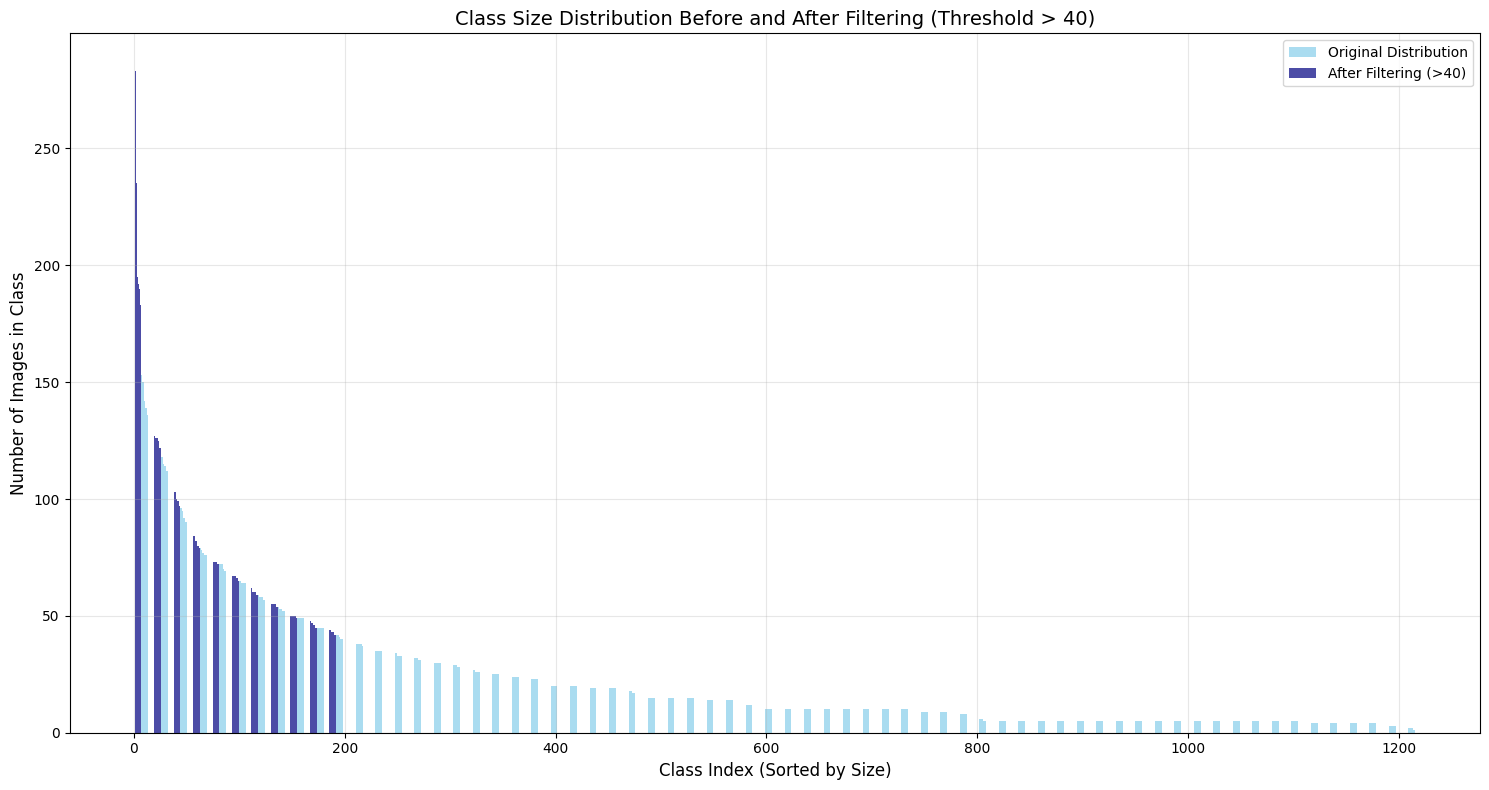


Distribution Statistics:
Original Distribution - Mean: 23.32, Median: 10.00
Filtered Distribution - Mean: 78.15, Median: 66.00
Number of classes removed: 1021


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the comparison plot
plt.figure(figsize=(15, 8))

# Sort both distributions by class size in descending order
original_sizes = labels_df['class_size'].sort_values(ascending=False)
filtered_sizes = filtered_40_labels_df['class_size'].sort_values(ascending=False)

# Create positions for the bars
x1 = np.arange(len(original_sizes))
x2 = np.arange(len(filtered_sizes))

# Create side-by-side bars
width = 0.35
plt.bar(x1, original_sizes, width, label='Original Distribution', color='skyblue', alpha=0.7)
plt.bar(x2 + width, filtered_sizes, width, label='After Filtering (>40)', color='navy', alpha=0.7)

# Customize the plot
plt.xlabel('Class Index (Sorted by Size)', fontsize=12)
plt.ylabel('Number of Images in Class', fontsize=12)
plt.title('Class Size Distribution Before and After Filtering (Threshold > 40)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('class_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print some statistics
print("\nDistribution Statistics:")
print(f"Original Distribution - Mean: {original_sizes.mean():.2f}, Median: {original_sizes.median():.2f}")
print(f"Filtered Distribution - Mean: {filtered_sizes.mean():.2f}, Median: {filtered_sizes.median():.2f}")
print(f"Number of classes removed: {len(original_sizes) - len(filtered_sizes)}")

In [ ]:
# First extract image_id from image_path
def extract_image_id(path):
    return path.split('/')[-1].split('_')[-1]  # gets the "0.jpg" part

# Update DataFrame with image_id
cars_df['image_id'] = cars_df['image_path'].apply(extract_image_id)

In [ ]:
import os
import shutil
from google.colab import drive
# First extract image_id from image_path
def extract_image_id(path):
    return path.split('/')[-1].split('_')[-1]  # gets the "0.jpg" part
# After creating class labels, group image_ids by class_label
image_id_groups = cars_df.groupby('class_label')['image_id'].agg(lambda x: ','.join(x)).reset_index()

# Create final labels DataFrame with class sizes and image_ids
class_counts = cars_df['class_label'].value_counts()
labels_df = pd.DataFrame({
    'label': class_counts.index,
    'class_size': class_counts.values
})
labels_df = labels_df.merge(image_id_groups, left_on='label', right_on='class_label')
labels_df = labels_df.drop('class_label', axis=1)  # remove duplicate column
labels_df = labels_df.sort_values('label').reset_index(drop=True)


# Update DataFrame with image_id
cars_df['image_id'] = cars_df['image_path'].apply(extract_image_id)
# Create filtered labels dataframe for threshold 40
filtered_40_labels_df = labels_df[labels_df['class_size'] > 40].reset_index(drop=True)

# Print total number of classes with >40 samples
print(f"Total number of classes with >40 samples: {len(filtered_40_labels_df)}")



Total number of classes with >40 samples: 196


In [ ]:
# Select 3 random labels for demo
demo_labels = filtered_40_labels_df.sample(n=3)
print("\nSelected labels for demo:")
for _, row in demo_labels.iterrows():
    print(f"Label: {row['label']}, Class size: {row['class_size']}")

# Create demo directory structure
demo_dir = "/content/drive/My Drive/LocalCV/demo_classes"
source_dir = "/content/drive/My Drive/LocalCV/car_images_v2"

# Create demo directory if it doesn't exist
if not os.path.exists(demo_dir):
    os.makedirs(demo_dir)

# Create subdirectories and copy files for each demo label
for _, row in demo_labels.iterrows():
    # Create class directory
    class_dir = os.path.join(demo_dir, row['label'])
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Copy image files
    image_ids = row['image_id'].split(',')
    for img_id in image_ids:
        source_path = os.path.join(source_dir, img_id.strip())
        dest_path = os.path.join(class_dir, img_id.strip())
        if os.path.exists(source_path):
            shutil.copy2(source_path, dest_path)

# Verify structure
print("\nDemo directory structure:")
for label in os.listdir(demo_dir):
    class_dir = os.path.join(demo_dir, label)
    num_files = len(os.listdir(class_dir))
    print(f"\n{label}:")
    print(f"Number of files: {num_files}")
    print("Sample files:")
    print('\n'.join(sorted(os.listdir(class_dir))[:3]))


Selected labels for demo:
Label: 2013-2016_jeep_cherokee, Class size: 106
Label: 2017-2020_infiniti_qx60, Class size: 56
Label: 2013-2016_honda_cr_v, Class size: 46

Demo directory structure:

2013-2016_jeep_cherokee:
Number of files: 106
Sample files:
13244.jpg
13245.jpg
13246.jpg

2017-2020_infiniti_qx60:
Number of files: 56
Sample files:
13960.jpg
13961.jpg
13962.jpg

2013-2016_honda_cr_v:
Number of files: 46
Sample files:
12406.jpg
12407.jpg
12408.jpg


In [ ]:
# Get valid classes (those with >40 samples)
valid_classes = filtered_40_labels_df['label'].tolist()

# Create simplified DataFrame with only needed columns and valid classes
filtered_cars_df = cars_df[cars_df['class_label'].isin(valid_classes)][['image_id', 'class_label']]

# Reset index for clean DataFrame
filtered_cars_df = filtered_cars_df.reset_index(drop=True)


In [ ]:
filtered_cars_df.head(10)

,image_id,class_label
0,12.jpg,2013-2016_hyundai_santa_fe
1,13.jpg,2013-2016_hyundai_santa_fe
2,14.jpg,2013-2016_hyundai_santa_fe
3,15.jpg,2013-2016_hyundai_santa_fe
4,16.jpg,2013-2016_hyundai_santa_fe
5,17.jpg,2013-2016_land_rover_range_rover_sport
6,18.jpg,2013-2016_land_rover_range_rover_sport
7,19.jpg,2013-2016_land_rover_range_rover_sport
8,21.jpg,2013-2016_land_rover_range_rover_sport
9,27.jpg,2013-2016_ford_edge


In [ ]:
print(len(filtered_cars_df))

15317


In [ ]:
unique_classes = filtered_cars_df['class_label'].unique()
print(unique_classes)
print(len(unique_classes))

['2013-2016_hyundai_santa_fe' '2013-2016_land_rover_range_rover_sport'
 '2013-2016_ford_edge' '2013-2016_toyota_sienna'
 '2013-2016_dodge_grand_caravan' '2017-2020_nissan_altima'
 '2017-2020_chevrolet_silverado_1500' '2021-2025_nissan_rogue'
 '2013-2016_cadillac_srx' '2013-2016_chevrolet_impala'
 '2013-2016_chevrolet_traverse' '2013-2016_jeep_wrangler_4xe'
 '2013-2016_chevrolet_equinox' '2013-2016_toyota_camry'
 '2017-2020_jeep_compass' '2017-2020_ford_transit_connect'
 '2013-2016_kia_optima' '2017-2020_jeep_grand_cherokee'
 '2017-2020_nissan_rogue' '2017-2020_ram_3500' '2013-2016_kia_forte'
 '2013-2016_dodge_dart' '2013-2016_chevrolet_tahoe'
 '2017-2020_ford_f_350_super_duty' '2021-2025_tesla_model_y'
 '2017-2020_hyundai_elantra' '2013-2016_toyota_tundra'
 '2021-2025_chevrolet_express_cargo' '2017-2020_toyota_camry'
 '2017-2020_mercedes-benz_cle' '2017-2020_bmw_x3' '2017-2020_ram_1500'
 '2013-2016_toyota_prius_v' '2017-2020_kia_optima' '2013-2016_bmw_z8'
 '2013-2016_audi_tt_rs' '2013-

In [ ]:
import os
import shutil
from google.colab import drive

# Define paths
source_dir = "/content/drive/My Drive/LocalCV/car_images_v2"
target_base_dir = "/content/drive/My Drive/LocalCV/combined_cropped"

# Create the target base directory
os.makedirs(target_base_dir, exist_ok=True)

# Create all unique class directories first (more efficient)
unique_classes = filtered_cars_df['class_label'].unique()
for class_label in unique_classes:
    os.makedirs(os.path.join(target_base_dir, class_label), exist_ok=True)

# Move files
moved_count = 0
errors = []

print(f"Starting to move {len(filtered_cars_df)} files...")

for _, row in filtered_cars_df.iterrows():
    try:
        source_file = os.path.join(source_dir, row['image_id'])
        target_dir = os.path.join(target_base_dir, row['class_label'])
        target_file = os.path.join(target_dir, row['image_id'])

        if os.path.exists(source_file):
            shutil.move(source_file, target_file)
            moved_count += 1

            # Print progress every 1000 files
            if moved_count % 1000 == 0:
                print(f"Moved {moved_count} files...")
    except Exception as e:
        errors.append((row['image_id'], str(e)))

print(f"\nOperation complete:")
print(f"- Successfully moved {moved_count} files")
if errors:
    print(f"- Encountered {len(errors)} errors")
    print("First few errors:", errors[:5])

# Verify results
print("\nVerifying directory structure:")
final_counts = {class_name: len(os.listdir(os.path.join(target_base_dir, class_name)))
                for class_name in unique_classes}

print("\nSample of class directories and their file counts:")
sample_counts = list(final_counts.items())[:5]
for class_name, count in sample_counts:
    print(f"{class_name}: {count} files")

# Check remaining files in source directory
remaining_files = os.listdir(source_dir)
print(f"\nFiles remaining in source directory: {len(remaining_files)}")

Starting to move 15317 files...
Moved 1000 files...
Moved 2000 files...
Moved 3000 files...
Moved 4000 files...
Moved 5000 files...
Moved 6000 files...
Moved 7000 files...
Moved 8000 files...
Moved 9000 files...
Moved 10000 files...
Moved 11000 files...
Moved 12000 files...
Moved 13000 files...
Moved 14000 files...
Moved 15000 files...

Operation complete:
- Successfully moved 15317 files

Verifying directory structure:

Sample of class directories and their file counts:
2013-2016_hyundai_santa_fe: 69 files
2013-2016_land_rover_range_rover_sport: 49 files
2013-2016_ford_edge: 65 files
2013-2016_toyota_sienna: 72 files
2013-2016_dodge_grand_caravan: 82 files

Files remaining in source directory: 13080


In [ ]:
import os

combined_dir = "/content/drive/My Drive/LocalCV/combined_cropped"

# Count total files across all subdirectories
total_files = 0
for root, dirs, files in os.walk(combined_dir):
    total_files += len([f for f in files if f.lower().endswith('.jpg')])

print(f"Total JPG files in combined_cropped: {total_files}")

# Also show count per class directory
print("\nFiles per class directory:")
for class_dir in os.listdir(combined_dir):
    class_path = os.path.join(combined_dir, class_dir)
    if os.path.isdir(class_path):
        num_files = len([f for f in os.listdir(class_path) if f.lower().endswith('.jpg')])
        print(f"{class_dir}: {num_files} files")


Total JPG files in combined_cropped: 31456

Files per class directory:
Audi_TTS_Coupe_2012: 85 files
Acura_TL_Sedan_2012: 86 files
Dodge_Dakota_Club_Cab_2007: 77 files
Hyundai_Sonata_Hybrid_Sedan_2012: 67 files
Ford_F-450_Super_Duty_Crew_Cab_2012: 83 files
Geo_Metro_Convertible_1993: 89 files
Dodge_Journey_SUV_2012: 86 files
Dodge_Charger_Sedan_2012: 82 files
Mitsubishi_Lancer_Sedan_2012: 95 files
Chevrolet_Traverse_SUV_2012: 88 files
Buick_Verano_Sedan_2012: 74 files
Toyota_Sequoia_SUV_2012: 77 files
Hyundai_Elantra_Sedan_2007: 84 files
Dodge_Caravan_Minivan_1997: 87 files
Volvo_C30_Hatchback_2012: 83 files
Plymouth_Neon_Coupe_1999: 88 files
Chevrolet_Malibu_Sedan_2007: 88 files
Volkswagen_Beetle_Hatchback_2012: 85 files
Chevrolet_Corvette_Ron_Fellows_Edition_Z06_2007: 75 files
Chrysler_300_SRT-8_2010: 97 files
BMW_M6_Convertible_2010: 82 files
GMC_Yukon_Hybrid_SUV_2012: 85 files
Nissan_Juke_Hatchback_2012: 88 files
Volvo_240_Sedan_1993: 91 files
Suzuki_SX4_Sedan_2012: 80 files
Dodge_

In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
old_dir = "/content/drive/My Drive/LocalCV/combined_cropped"
new_base_dir = "/content/drive/My Drive/LocalCV/Final Data"

# First rename the directory
if os.path.exists(old_dir):
    os.rename(old_dir, new_base_dir)

# Create train/test/val directories
splits = ['train', 'test', 'val']
for split in splits:
    split_dir = os.path.join(new_base_dir, split)
    os.makedirs(split_dir, exist_ok=True)

# Get all class names
class_names = [d for d in os.listdir(new_base_dir) if os.path.isdir(os.path.join(new_base_dir, d))
               and d not in splits]

# Create class subdirectories in each split
for split in splits:
    for class_name in class_names:
        os.makedirs(os.path.join(new_base_dir, split, class_name), exist_ok=True)

# Function to move files
def move_files(files, src_dir, dst_dir):
    for f in files:
        shutil.move(os.path.join(src_dir, f), os.path.join(dst_dir, f))

# Track total counts
total_counts = {'train': 0, 'val': 0, 'test': 0}

# Split each class
for class_name in class_names:
    class_dir = os.path.join(new_base_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Get all files for this class
    files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]

    if len(files) == 0:
        continue

    # First split into train+val and test (80-20)
    train_val_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

    # Then split train+val into train and val (80-20)
    train_files, val_files = train_test_split(train_val_files, test_size=0.2, random_state=42)

    # Move files to respective directories
    move_files(train_files, class_dir, os.path.join(new_base_dir, 'train', class_name))
    move_files(val_files, class_dir, os.path.join(new_base_dir, 'val', class_name))
    move_files(test_files, class_dir, os.path.join(new_base_dir, 'test', class_name))

    # Update counts
    total_counts['train'] += len(train_files)
    total_counts['val'] += len(val_files)
    total_counts['test'] += len(test_files)

    # Remove now-empty class directory
    os.rmdir(class_dir)

# Calculate percentages
total_files = sum(total_counts.values())
percentages = {k: (v/total_files)*100 for k,v in total_counts.items()}

print("\nFinal Distribution:")
print(f"Total files: {total_files}")
for split in splits:
    print(f"{split}: {total_counts[split]} files ({percentages[split]:.1f}%)")

# Verify structure
print("\nSample of class distribution:")
sample_class = class_names[0]
print(f"\nExample for class '{sample_class}':")
for split in splits:
    split_path = os.path.join(new_base_dir, split, sample_class)
    count = len(os.listdir(split_path))
    print(f"{split}: {count} files")


Final Distribution:
Total files: 31374
train: 19806 files (63.1%)
test: 6417 files (20.5%)
val: 5151 files (16.4%)

Sample of class distribution:

Example for class 'Audi_TTS_Coupe_2012':
train: 54 files
test: 17 files
val: 14 files


In [ ]:
import os
from collections import Counter

# Define base directory
base_dir = "/content/drive/My Drive/LocalCV/Copy of Final Data"

# Get classes and counts for each split
split_info = {}
for split in ['train', 'test', 'val']:
    split_path = os.path.join(base_dir, split)
    if os.path.exists(split_path):
        # Get classes in this split
        classes = sorted([d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))])
        # Count images per class
        class_counts = {}
        for class_name in classes:
            class_path = os.path.join(split_path, class_name)
            class_counts[class_name] = len([f for f in os.listdir(class_path) if f.endswith('.jpg')])

        split_info[split] = {
            'classes': set(classes),
            'num_classes': len(classes),
            'class_counts': class_counts,
            'total_images': sum(class_counts.values())
        }

# Check consistency
if len(split_info) == 3:
    # Get all unique classes
    all_classes = set.union(*(info['classes'] for info in split_info.values()))

    print("Split Analysis:")
    print("--------------")
    for split, info in split_info.items():
        print(f"\n{split.upper()}:")
        print(f"Number of classes: {info['num_classes']}")
        print(f"Total images: {info['total_images']}")

    print("\nClass Consistency Check:")
    print("------------------------")
    print(f"Total unique classes across all splits: {len(all_classes)}")

    # Check for missing classes in each split
    for split, info in split_info.items():
        missing = all_classes - info['classes']
        if missing:
            print(f"\nClasses missing in {split}: {missing}")

    # If all splits have same classes, show distribution for verification
    if all(info['classes'] == all_classes for info in split_info.values()):
        print("\nAll splits have the same classes!")

        # Show sample of class distributions
        print("\nSample class distributions (first 5 classes):")
        sample_classes = sorted(list(all_classes))[:5]
        for class_name in sample_classes:
            print(f"\n{class_name}:")
            for split in split_info:
                count = split_info[split]['class_counts'][class_name]
                print(f"{split}: {count} images")
else:
    print("Error: Not all splits (train/test/val) found in directory")


Split Analysis:
--------------

TRAIN:
Number of classes: 392
Total images: 19806

TEST:
Number of classes: 392
Total images: 6417

VAL:
Number of classes: 392
Total images: 5151

Class Consistency Check:
------------------------
Total unique classes across all splits: 392

All splits have the same classes!

Sample class distributions (first 5 classes):

2013-2016_acura_mdx:
train: 30 images
test: 10 images
val: 8 images

2013-2016_audi_allroad_quattro:
train: 35 images
test: 11 images
val: 9 images

2013-2016_audi_tt_rs:
train: 30 images
test: 10 images
val: 8 images

2013-2016_bmw_3_series:
train: 39 images
test: 13 images
val: 10 images

2013-2016_bmw_4_series:
train: 32 images
test: 10 images
val: 8 images


In [ ]:
import os
from collections import Counter

# Define base directory
base_dir = "/content/drive/My Drive/LocalCV/Copy of Final Data"

# Get all directories in base folder
all_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
print("All directories found:", all_dirs)

# Separate splits and other directories
split_dirs = {'train', 'test', 'val'}
other_dirs = [d for d in all_dirs if d not in split_dirs]

print("\nExtra folders found:", other_dirs)

# Get classes from the extra folder(s)
extra_classes = set()
for extra_dir in other_dirs:
    extra_path = os.path.join(base_dir, extra_dir)
    if os.path.isdir(extra_path):
        # If this directory contains subdirectories (classes)
        extra_classes.update([d for d in os.listdir(extra_path) if os.path.isdir(os.path.join(extra_path, d))])

# Get classes from each split
split_classes = {}
for split in split_dirs:
    split_path = os.path.join(base_dir, split)
    if os.path.exists(split_path):
        split_classes[split] = set([d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))])

# Compare classes
if extra_classes:
    print("\nChecking if classes from extra folder(s) exist in splits:")
    for extra_class in extra_classes:
        print(f"\nClass '{extra_class}':")
        for split in split_dirs:
            if split in split_classes:
                exists = extra_class in split_classes[split]
                print(f"Exists in {split}: {exists}")
                if exists:
                    # Count images
                    split_path = os.path.join(base_dir, split, extra_class)
                    num_images = len([f for f in os.listdir(split_path) if f.endswith('.jpg')])
                    print(f"Number of images in {split}: {num_images}")

# Count images in extra folders
if other_dirs:
    print("\nImages in extra folder(s):")
    for extra_dir in other_dirs:
        dir_path = os.path.join(base_dir, extra_dir)
        if os.path.isdir(dir_path):
            # If directory contains subdirectories
            subdirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
            if subdirs:
                for subdir in subdirs:
                    subdir_path = os.path.join(dir_path, subdir)
                    num_images = len([f for f in os.listdir(subdir_path) if f.endswith('.jpg')])
                    print(f"{extra_dir}/{subdir}: {num_images} images")
            else:
                # If directory contains images directly
                num_images = len([f for f in os.listdir(dir_path) if f.endswith('.jpg')])
                print(f"{extra_dir}: {num_images} images")

All directories found: ['Ram_C', 'train', 'test', 'val']

Extra folders found: ['Ram_C']

Checking if classes from extra folder(s) exist in splits:

Class 'V_Cargo_Van_Minivan_2012':
Exists in val: False
Exists in train: False
Exists in test: False

Images in extra folder(s):
Ram_C/V_Cargo_Van_Minivan_2012: 82 images
